<a href="https://colab.research.google.com/github/Ranjani94/Machine_Learning/blob/master/Alternus_Vera/AlternusVera_Sprint4_Clickbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alternus Vera : Clickbait

- Course code : CMPE-257
- Team name : The Expendables

###Datasets

- Liar Liar Pants on Fire Dataset 
- Fake News Dataset
- News Category Dataset


Github URL: https://github.com/Ranjani94/Machine_Learning/blob/master/Alternus_Vera/AlternusVera_Sprint4_Clickbait.ipynb

###Process Steps:

 - Load the Data
 - Distillation Process
        - Data Preparation
        - Data Observation
        - Data Cleaning and Text Preprocessing
        - Data Visualization
        - Feature Extraction
        - TF-IDF Vectorization
        - LDA Topic Modelling
        - Classification
        - Extract Feature Vector
 - Classification Models
        - Random Forest Classifier
        - XGBoost classifier
        - Decision Tree Classifier
 - Ranking and Importance
 - Merge all features and individual contributions
 - Form Polynomial Equation


###Individual Contributions

- Political Bias - Vignesh Kumar Thangarajan
- Title Vs Body - Pooja Patil
- Clickbait - Sivaranjani Kumar
- Node Rank - Akshaya Nagarajan








###References: Clickbait

https://medium.com/zerone-magazine/you-wont-believe-how-these-9-shocking-clickbaits-work-number-8-is-a-killer-4cb2ceded8b6

https://almeta.io/en/blog/how-to-detect-clickbait-headlines-using-nlp/

https://www.kaggle.com/c/fake-news/data

https://people.mpi-sws.org/~achakrab/papers/chakraborty_clickbait_asonam16.pdf

[1] Biyani, Prakhar, Kostas Tsioutsiouliklis, and John Blackmer. “” 8 Amazing Secrets for Getting More Clicks”: Detecting Clickbaits in News Streams Using Article Informality.” Thirtieth AAAI Conference on Artificial Intelligence. 2016.

[2] Potthast, Martin, et al. “The clickbait challenge 2017: towards a regression model for clickbait strength.” arXiv preprint arXiv:1812.10847 (2018).

[3] Venneti, Lasya, and Aniket Alam. “How Curiosity can be modeled for a Clickbait Detector.” arXiv preprint arXiv:1806.04212 (2018)

##Loading Data..

In [60]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
liarFilepath = base_dir + '/Alternus_vera/liar_dataset/Liardataset.csv'
df = pd.read_csv(liarFilepath, encoding= 'unicode_escape') 

In [63]:
df.head(2)

,json,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


In [64]:
df['class'].value_counts()

half-true      2627
FALSE          2507
mostly-true    2454
barely-true    2103
TRUE           2053
pants-fire     1047
Name: class, dtype: int64

###Data Cleaning and Text Preprocessing
Steps included in the preprocessing:

- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming
- Spell Check

In [65]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.stem import WordNetLemmatizer 
def lemmatization(x):
  lemmatizer = WordNetLemmatizer() 
  text = lemmatizer.lemmatize(x)
  return text

In [0]:
import re
def removenumbers(x):
  text = re.sub(r'\d+', '', x)
  return text

In [0]:
def removespecialchars(x):
  x = str(x)
  x = x.lower()
  regex = re.compile('[^ a-zA-Z]')
  return regex.sub('',x)

In [0]:
def removewhitespace(x):
  text = x.rstrip()
  text = text.lstrip()
  return text

In [70]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
def removestopwords(x):
  tokens = word_tokenize(x)
  result = [i for i in tokens if not i in stop_words]
  return result

In [0]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()
def stemming(wordList):
  res = []
  for word in wordList:
    res.append(stemmer.stem(word))
  return res

In [0]:
def preprocess_text(x):
  text = removenumbers(x)
  text = removespecialchars(text)
  text = removewhitespace(text)
  wordList = removestopwords(text)
  text = ' '.join(wordList)
  res = lemmatization(text)
  return res

In [0]:
df = df.sample(frac=1)

In [0]:
df['clean_statement'] = df['statement'].apply(preprocess_text)

In [76]:
df.head(3)

,json,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
1517,5493.json,TRUE,Between 1982 and 2007 the cost of a college ed...,education,ron-wyden,U.S. Senator,Oregon,democrat,0.0,1.0,0.0,3.0,0.0,a news release,cost college education increased percent
10923,6610.json,mostly-true,The unemployment rate is declining faster in T...,"economy,jobs",bob-buckhorn,NaN,Florida,none,2.0,1.0,2.0,1.0,0.0,a speech at the RNC,unemployment rate declining faster tampa
2311,2136.json,barely-true,25 percent of our economy is the financial sec...,"corporations,economy,financial-regulation,pundits",david-gregory,Host of NBC's Meet the Press,"Washington, D.C.",none,1.0,0.0,0.0,1.0,0.0,an interview with Treasury Secretary Timothy G...,percent economy financial sector


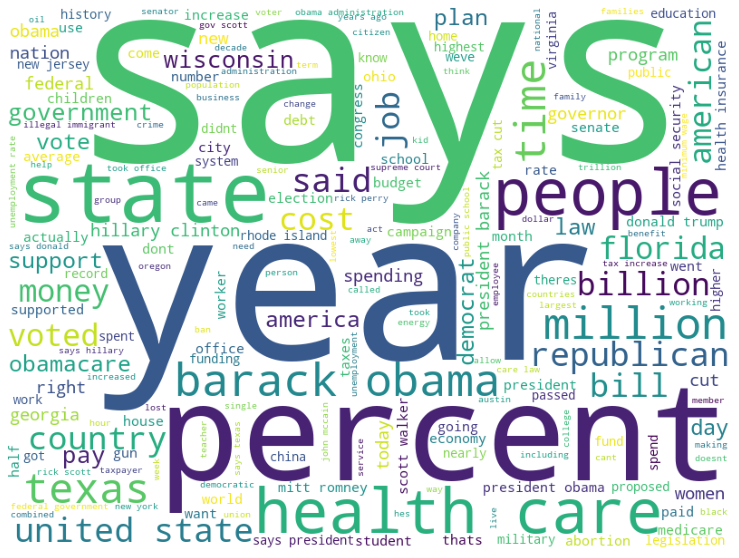

In [77]:
from wordcloud import WordCloud, STOPWORDS
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df['clean_statement']))

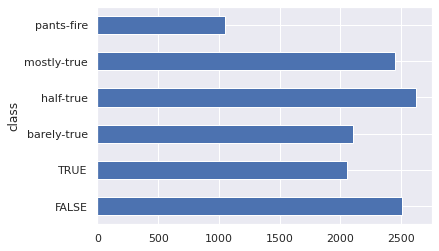

In [78]:
df.groupby(['class']).size().plot(kind='barh')

In [0]:
df = df[['class', 'statement', 'subject', 'speaker', 'speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'clean_statement']]

In [80]:
df['class'].unique()

array(['TRUE', 'mostly-true', 'barely-true', 'half-true', 'pants-fire',
       'FALSE'], dtype=object)

In [81]:
df['class'].astype(str, errors='ignore')

1517            TRUE
10923    mostly-true
2311     barely-true
12492    barely-true
2378       half-true
            ...     
1811           FALSE
4408       half-true
6356     mostly-true
4010     barely-true
10463           TRUE
Name: class, Length: 12791, dtype: object

In [82]:
df.dtypes

class                    object
statement                object
subject                  object
speaker                  object
speaker_job_title        object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
clean_statement          object
dtype: object

###Dividing dataset into all true and all false..

In [0]:
#All True
full_true = df.loc[df['class'] == 'TRUE']
most_true = df.loc[df['class'] == 'mostly-true']
half_true = df.loc[df['class'] == 'half-true']

#All False
barely_true = df.loc[df['class'] == 'barely-true']
full_false = df.loc[df['class'] == 'FALSE']
pants_fire = df.loc[df['class'] == 'pants-fire']

In [84]:
half_true.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
2378,half-true,Says under U.S. Sen. Robert Menendezs watch th...,"candidates-biography,debt,deficit,economy,jobs",joseph-kyrillos,State Senator,New Jersey,republican,3.0,3.0,2.0,2.0,1.0,a debate on NJTV,says sen robert menendezs watch nations unempl...
3502,half-true,"Under Charlie Crist, Florida lost 825,000 jobs...","economy,jobs",rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference,charlie crist florida lost jobs unemployment r...


In [85]:
full_false.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
2301,FALSE,On expanding Medicaid under the Affordable Car...,health-care,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,interviews with reporters,expanding medicaid affordable care act
9701,FALSE,"Health care reform ""establishes a new board of...",health-care,house-republicans,NaN,NaN,republican,0.0,3.0,4.0,0.0,1.0,a news release,health care reform establishes new board feder...


In [86]:
pants_fire.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
11985,pants-fire,Says the congressional ethics investigation ag...,"bipartisanship,ethics",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican,16.0,15.0,20.0,10.0,11.0,an interview with Fox News' Greta Van Susteren,says congressional ethics investigation conduc...
6273,pants-fire,Obama ad contends that John McCain endorses Ru...,immigration,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a video ad.,obama ad contends john mccain endorses rush li...


In [87]:
barely_true.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
2311,barely-true,25 percent of our economy is the financial sec...,"corporations,economy,financial-regulation,pundits",david-gregory,Host of NBC's Meet the Press,"Washington, D.C.",none,1.0,0.0,0.0,1.0,0.0,an interview with Treasury Secretary Timothy G...,percent economy financial sector
12492,barely-true,We flood communities with so many guns that it...,guns,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a speech at a memorial service in Dallas,flood communities guns easier teenager buy glo...


In [0]:
ls = full_true.columns

In [89]:
ls

Index(['class', 'statement', 'subject', 'speaker', 'speaker_job_title',
       'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts',
       'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
       'context', 'clean_statement'],
      dtype='object')

In [0]:
all_true = pd.concat([full_true, most_true, half_true])
all_false = pd.concat([barely_true,full_false,pants_fire])

In [91]:
all_true['class'].unique()

array(['TRUE', 'mostly-true', 'half-true'], dtype=object)

In [92]:
all_false['class'].unique()

array(['barely-true', 'FALSE', 'pants-fire'], dtype=object)

In [0]:
all_true = all_true[['class', 'clean_statement', 'context', 'subject', 'speaker', 'speaker_job_title','state_info','party_affiliation','half_true_counts','mostly_true_counts']]
all_false = all_false[['class', 'clean_statement', 'context', 'subject', 'speaker', 'speaker_job_title','state_info','party_affiliation','barely_true_counts','false_counts','pants_on_fire_counts']]

In [0]:
features = ['clean_statement']

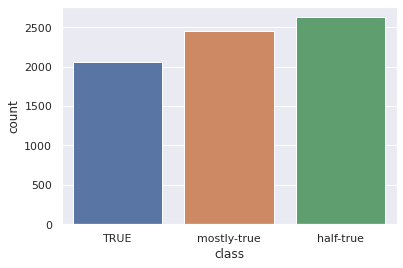

In [95]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=all_true)

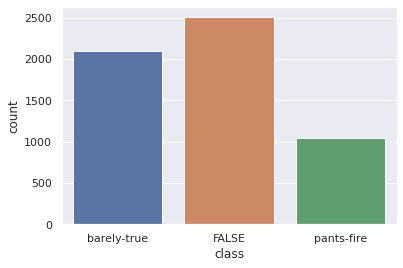

In [96]:
ax = sns.countplot(x="class", data=all_false)

#All_True

In [97]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_true['class'])

LabelEncoder()

In [0]:
label = le.transform(all_true['class'])

In [99]:
le.transform(all_true['class'])

array([0, 0, 0, ..., 1, 1, 1])

In [100]:
np.unique(label, return_index=True)

(array([0, 1, 2]), array([   0, 4507, 2053]))

In [0]:
y = label

In [102]:
le.inverse_transform(y)

array(['TRUE', 'TRUE', 'TRUE', ..., 'half-true', 'half-true', 'half-true'],
      dtype=object)

In [103]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [104]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
rfmodel = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

In [0]:
temp = all_true[features]

In [107]:
temp.head(3)

,clean_statement
1517,cost college education increased percent
1396,granite staters hold individual policies anthe...
12241,making largest investment education nations hi...


In [108]:
temp.shape


(7134, 1)

In [0]:
X_title_text = all_true.clean_statement.values

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)

In [0]:
X_title_tfidf = tfidf.fit_transform (X_title_text)

In [0]:
#X_title_tfidf_train, X_title_tfidf_test, y_title_train, y_title_test = train_test_split(X_title_tfidf,y, test_size = 0.2, random_state=1234)

In [113]:
rfmodel.fit(X_title_tfidf, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#y_true_pred = rfmodel.predict(X_title_tfidf_test)

In [0]:
#print ("Random Forest F1 and Accuracy Scores for the 'Title' of the dataset : \n")
#print ( "F1 score {:.4}%".format( f1_score(y_title_test, y_true_pred, average='macro')*100 ) )
#print ( "Accuracy  {:.4}%".format(accuracy_score(y_title_test, y_true_pred)*100))

In [0]:
newscategoryFilepath = base_dir + '/Alternus_vera/News_Category.csv'

In [0]:
df_newscat = pd.read_csv(newscategoryFilepath)

In [0]:
df_newscat = df_newscat.loc[df_newscat['category'] == 'POLITICS']

In [119]:
df_newscat.head(4)

,category,headline,authors,link,short_description,date
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18


In [0]:
df_newscat=df_newscat.dropna()

In [0]:
df_newscat['clean_text'] = df_newscat.apply(lambda row: preprocess_text(str(row['short_description'])), axis=1)

In [122]:
X_title_tfidf.shape

(7134, 150)

In [0]:
X_clean_text = df_newscat.clean_text.values

In [0]:
X_text_tfidf = tfidf.fit_transform(X_clean_text)

In [125]:
X_text_tfidf.shape

(26913, 84)

In [0]:
A=X_text_tfidf.toarray()

In [0]:
A = np.pad(A, ((0,0),(0,66)), mode='constant')

In [128]:
A.shape

(26913, 150)

In [0]:
y_pred = rfmodel.predict(A)

In [130]:
np.unique(le.inverse_transform(y_pred))

array(['TRUE', 'half-true', 'mostly-true'], dtype=object)

In [0]:
df_newscat['textlabel'] = le.inverse_transform(y_pred)

In [132]:
df_newscat.head(5)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18,peeping minute,half-true
17,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...,Laura Bassett,https://www.huffingtonpost.com/entry/results-f...,Irish women will no longer have to travel to t...,5/26/18,irish women longer travel united kingdom end p...,half-true


In [133]:
df_newscat['textlabel'].value_counts()

half-true      26630
mostly-true      280
TRUE               3
Name: textlabel, dtype: int64

#All_False

In [134]:
from sklearn import preprocessing
le_false = preprocessing.LabelEncoder()
le_false.fit(all_false['class'])

LabelEncoder()

In [0]:
label_false = le_false.transform(all_false['class'])

In [136]:
le_false.transform(all_false['class'])

array([1, 1, 1, ..., 2, 2, 2])

In [137]:
np.unique(label_false, return_index=True)

(array([0, 1, 2]), array([2103,    0, 4610]))

In [0]:
y_false = label_false

In [139]:
le_false.inverse_transform(y_false)

array(['barely-true', 'barely-true', 'barely-true', ..., 'pants-fire',
       'pants-fire', 'pants-fire'], dtype=object)

In [140]:
y_false

array([1, 1, 1, ..., 2, 2, 2])

###Random Forest Classifier

In [0]:
rfmodel_false = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

In [0]:
False_text = all_false.clean_statement.values

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)
False_features_tfidf = tfidf.fit_transform (False_text)

In [0]:
#X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(False_features_tfidf,y_false, test_size = 0.2, random_state=1234)

In [145]:
rfmodel_false.fit(False_features_tfidf, y_false)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#y_false_pred = rfmodel_false.predict(X_tfidf_test)

In [0]:
#print ("Random Forest F1 and Accuracy Scores for the 'Title' of the dataset : \n")
#print ( "F1 score {:.4}%".format( f1_score(y_test, y_false_pred, average='macro')*100 ) )
#print ( "Accuracy  {:.4}%".format(accuracy_score(y_test, y_false_pred)*100))

##Importing Fake news Dataset

In [0]:
fake_news = base_dir + '/Alternus_vera/fake.csv'
df_fake = pd.read_csv(fake_news) 

In [149]:
df_fake.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


In [150]:
df_fake.language.unique()

array(['english', 'ignore', 'german', 'french', 'spanish', 'russian',
       'greek', 'finnish', 'portuguese', 'arabic', 'dutch', 'italian',
       'turkish', 'norwegian', 'chinese', 'polish'], dtype=object)

In [0]:
df_fake = df_fake[df_fake['language'] == 'english']

In [0]:
# df_fake.head(2)

In [0]:
df1_fake = df_fake[['author', 'title', 'text', 'site_url', 'domain_rank']]

In [154]:
df1_fake.head(2)

,author,title,text,site_url,domain_rank
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0


In [155]:
df1_fake.dtypes

author          object
title           object
text            object
site_url        object
domain_rank    float64
dtype: object

In [156]:
preprocess_text('the Siva ranhjf fgvdf')

'siva ranhjf fgvdf'

In [157]:
df1_fake.shape

(12403, 5)

In [0]:
df1_fake=df1_fake.dropna()

In [159]:
df1_fake['clean_title'] = df1_fake.apply(lambda row: preprocess_text(str(row['title'])), axis=1)
df1_fake.head()

,author,title,text,site_url,domain_rank,clean_title
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,pin drop speech father daughter kidnapped kill...
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,25689.0,fantastic trumps point plan reform healthcare ...


In [160]:
df1_fake.shape

(5993, 6)

In [161]:
fake_text = df1_fake.clean_title.values
fake_text[0]

'muslims busted stole millions govt benefits'

In [0]:
fake_features_tfidf = tfidf.fit_transform (fake_text)

In [163]:
fake_features_tfidf.shape

(5993, 45)

In [164]:
False_features_tfidf.shape

(5657, 133)

In [165]:
rfmodel_false.fit(False_features_tfidf, y_false)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# type(fake_features_tfidf)

In [0]:
A=fake_features_tfidf.toarray()

In [168]:
A.shape

(5993, 45)

In [0]:
A = np.pad(A, ((0,0),(0,88)), mode='constant')

In [170]:
A.shape

(5993, 133)

In [0]:
y_pred= rfmodel_false.predict(A)

In [172]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
np.unique(y_pred)

array([0])

In [174]:
np.unique(le_false.inverse_transform(y_pred))

array(['FALSE'], dtype=object)

In [0]:
df1_fake['textlabel'] = le_false.inverse_transform(y_pred)

In [176]:
df1_fake['textlabel'].value_counts()

FALSE    5993
Name: textlabel, dtype: int64

In [177]:
df1_fake.head(3)

,author,title,text,site_url,domain_rank,clean_title,textlabel
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...,FALSE


In [0]:
df2_fake = df1_fake[['text', 'author', 'clean_title', 'textlabel']]

In [179]:
df1_fake.head(4)

,author,title,text,site_url,domain_rank,clean_title,textlabel
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...,FALSE
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,pin drop speech father daughter kidnapped kill...,FALSE


In [180]:
df_newscat.head(3)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true


In [0]:
df2_newscat = df_newscat[['clean_text', 'authors', 'headline', 'textlabel']]

In [182]:
df_newscat.head(4)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18,peeping minute,half-true


In [183]:
df.head(3)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
1517,TRUE,Between 1982 and 2007 the cost of a college ed...,education,ron-wyden,U.S. Senator,Oregon,democrat,0.0,1.0,0.0,3.0,0.0,a news release,cost college education increased percent
10923,mostly-true,The unemployment rate is declining faster in T...,"economy,jobs",bob-buckhorn,NaN,Florida,none,2.0,1.0,2.0,1.0,0.0,a speech at the RNC,unemployment rate declining faster tampa
2311,barely-true,25 percent of our economy is the financial sec...,"corporations,economy,financial-regulation,pundits",david-gregory,Host of NBC's Meet the Press,"Washington, D.C.",none,1.0,0.0,0.0,1.0,0.0,an interview with Treasury Secretary Timothy G...,percent economy financial sector


In [0]:
df_liar = df[['clean_statement', 'speaker', 'subject', 'class']]

In [185]:
df.head(4)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
1517,TRUE,Between 1982 and 2007 the cost of a college ed...,education,ron-wyden,U.S. Senator,Oregon,democrat,0.0,1.0,0.0,3.0,0.0,a news release,cost college education increased percent
10923,mostly-true,The unemployment rate is declining faster in T...,"economy,jobs",bob-buckhorn,NaN,Florida,none,2.0,1.0,2.0,1.0,0.0,a speech at the RNC,unemployment rate declining faster tampa
2311,barely-true,25 percent of our economy is the financial sec...,"corporations,economy,financial-regulation,pundits",david-gregory,Host of NBC's Meet the Press,"Washington, D.C.",none,1.0,0.0,0.0,1.0,0.0,an interview with Treasury Secretary Timothy G...,percent economy financial sector
12492,barely-true,We flood communities with so many guns that it...,guns,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a speech at a memorial service in Dallas,flood communities guns easier teenager buy glo...


#Creating column for a feature - clickbait 

Clickbaits are highly attention seeking in any websites. They can be pointed out by the use of certain sentences, images, keywords and symbols..

1. Sentances which contain ?, !, #, %, $
2. Use of words like ASAP, Click Here!, Hurry Up!, Offers, Click Now!

Bad Clickbait Examples:
1. She dragged her plate across the pool. What happened next blew my mind
2. When you read these 19 shocking food facts, you'll never want to eat again
3. He thought it was Bigfoot's skull, but then experts told him THIS
4. 87 yr old trainer shares secret to losing weight
5. Click to know more details
6. Can Face Masks Prevent You From Getting the Coronavirus? Doctors Weight In



Features that refer to clickbaits:
1. Textual Features
      
Title-based:

      - The presence/number of some features in the title: numbers,punctuations (exclamation marks, question marks, etc…), question words, stopwords, etc…
      - POS-based: the presence of superlative adverbs and adjectives
      - Sentiment-based: presence/number of negative/positive sentiment words, sentiment polarity.
      - Lexicon-based: presence/number of specific phrases (click here, exclusive, won’t believe, happens next, don’t want, you know, etc…)
      - word2vec-based: the word2vec representation of the headline.
      - Words-based: N-gram, TFIDF.
      - Char-based: N-gram.

Content- based:

      - Length-based: average words per sentence.
      - Words-based: N-gram, TFIDF

  Similarity-based:
  
      - The textual similarity between the headline and the content (all the content, first lines, summary, or meta description).

In [186]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df_clickbait = df1_fake[['title','text','clean_title']]

###Printing Counts of each word in clean_title

In [188]:
df_clickbait.clean_title.str.split(expand=True).stack().value_counts()[:50]

trump            815
hillary          627
clinton          502
election         295
new              284
fbi              233
comment          230
video            217
donald           165
obama            153
war              139
emails           127
email            120
campaign         118
russia           115
people           114
wikileaks        112
hillarys         112
day              108
world            107
watch            103
clintons         103
vote             102
trumps           101
media             99
says              97
breaking          96
police            95
black             92
investigation     92
america           91
news              88
muslim            86
president         82
voting            80
state             80
white             79
like              70
gold              65
time              63
syria             62
isis              61
rock              61
man               60
american          60
report            59
know              59
information  

Creating tokens of sentence..

In [189]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
print(get_word_tokens("Hi Kirupa here what are you doing kirupa"))

['kirupa', 'here', 'what', 'doing', 'kirupa']


Testing the Gensim corpora Dictionary..

In [190]:
texts = [['human', 'interface', 'computer','computer']]
dct = gensim.corpora.Dictionary(texts)  # initialize a Dictionary
dct.add_documents([["cat", "say", "meow"], ["dog"]])  # add more document (extend the vocabulary)
for k, v in dct.iteritems():
  print(k, v)
dct.doc2bow(["dog", "computer", "non_existent_word", "computer"])

0 computer
1 human
2 interface
3 cat
4 meow
5 say
6 dog


[(0, 2), (6, 1)]

Creating dictionary of words..

In [0]:
def get_dictionary_print_words(dataframe,colname):
    processed_docs = dataframe[colname].map(lambda doc: doc.split(" "))
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    #print('######## DICTIONARY Words and occurences ########')
    # for k, v in dictionary_gensim.iteritems():
    #     print(k, v)
    #     count += 1
    #     if count > 10:
    #         break
    print("Number of uniqiue words : ", len(dictionary_gensim))      
    #dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    tokenized_docs_local = dataframe[colname].map(get_word_tokens)
    return dictionary_gensim, tokenized_docs_local

Creating doc2bow using Gensim library..

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

In [193]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(df_clickbait,
                                                                      'clean_title')

Number of uniqiue words :  10299

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

 ######## PREVIEW BOW ########
Word 0 ("benefits") appears 1 time.
Word 1 ("busted") appears 1 time.
Word 2 ("govt") appears 1 time.
Word 3 ("millions") appears 1 time.
Word 4 ("muslims") appears 1 time.
Word 5 ("stole") appears 1 time.


Computing TDIDF for the bow...

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [195]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)
print(type(tfidf_corpus_headline))


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.4651970327250176),
 (1, 0.38488895424353203),
 (2, 0.4024932995609123),
 (3, 0.35958054227830727),
 (4, 0.3375001522923763),
 (5, 0.4798404300089668)]
<class 'gensim.interfaces.TransformedCorpus'>


Applying LDA on the TFIDF...

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    return lda_model

In [0]:
# Running LDA model to create number of topics
lda_model_headline = get_lda_model_topics_topwords_print_top_topics(bow_corpus_headline, 10 ,dictionary_headline)

Printing Top 10 Topics..

In [198]:
lda_all_topics=lda_model_headline.show_topics(num_topics=30, num_words=10,formatted=False)
lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

#Below Code Prints Topics and Words
for topic,words in lda_topics_words:
    print(str(topic)+ "::"+ str(words))

0::['clinton', 'hillary', 'trump', 'video', 'election', 'foundation', 'police', 'people', 'admits', 'obamacare']
1::['trump', 'hillary', 'clinton', 'election', 'comment', 'video', 'vote', 'breaking', 'government', 'democrats']
2::['trump', 'clintons', 'says', 'americas', 'help', 'people', 'syria', 'obama', 'russia', 'hillary']
3::['trump', 'clinton', 'hillary', 'obama', 'donald', 'election', 'white', 'watch', 'video', 'know']
4::['clinton', 'standing', 'rock', 'police', 'comment', 'hillarys', 'trump', 'election', 'media', 'email']
5::['hillary', 'trump', 'world', 'comment', 'clinton', 'russia', 'america', 'george', 'soros', 'like']
6::['trump', 'comment', 'state', 'hillarys', 'world', 'election', 'donald', 'president', 'days', 'american']
7::['trump', 'election', 'clinton', 'hillary', 'vote', 'pipeline', 'public', 'donald', 'right', 'breaking']
8::['clinton', 'trump', 'wikileaks', 'hillary', 'emails', 'election', 'investigation', 'campaign', 'evidence', 'voting']
9::['trump', 'comment'

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

In [201]:
new_columns = ['topic_number', 'topic_score', 'topic_frequent_words']
df_clickbait = update_lda_results_to_dataset(
    df_clickbait,new_columns,'clean_title',
  dictionary_headline,lda_model_headline,lda_topics_words)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [202]:
df_clickbait.head(10)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,9,0.480581,trump comment hillary clinton trumps donald vi...
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,1,0.702909,trump hillary clinton election comment video v...
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,breaking weiner cooperating fbi hillary email ...,5,0.871408,hillary trump world comment clinton russia ame...
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,pin drop speech father daughter kidnapped kill...,9,0.496496,trump comment hillary clinton trumps donald vi...
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,fantastic trumps point plan reform healthcare ...,9,0.909991,trump comment hillary clinton trumps donald vi...
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,hillary goes absolutely berserk protester rall...,1,0.483000,trump hillary clinton election comment video v...
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,breaking nypd ready arrests weiner casehillary...,3,0.952623,trump clinton hillary obama donald election wh...
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,wow whistleblower tells chilling story massive...,8,0.947043,clinton trump wikileaks hillary emails electio...
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,breaking clinton clearedwas coordinated minute...,9,0.918158,trump comment hillary clinton trumps donald vi...
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,evil hillary supporters yell fck trumpburn tru...,2,0.930752,trump clintons says americas help people syria...


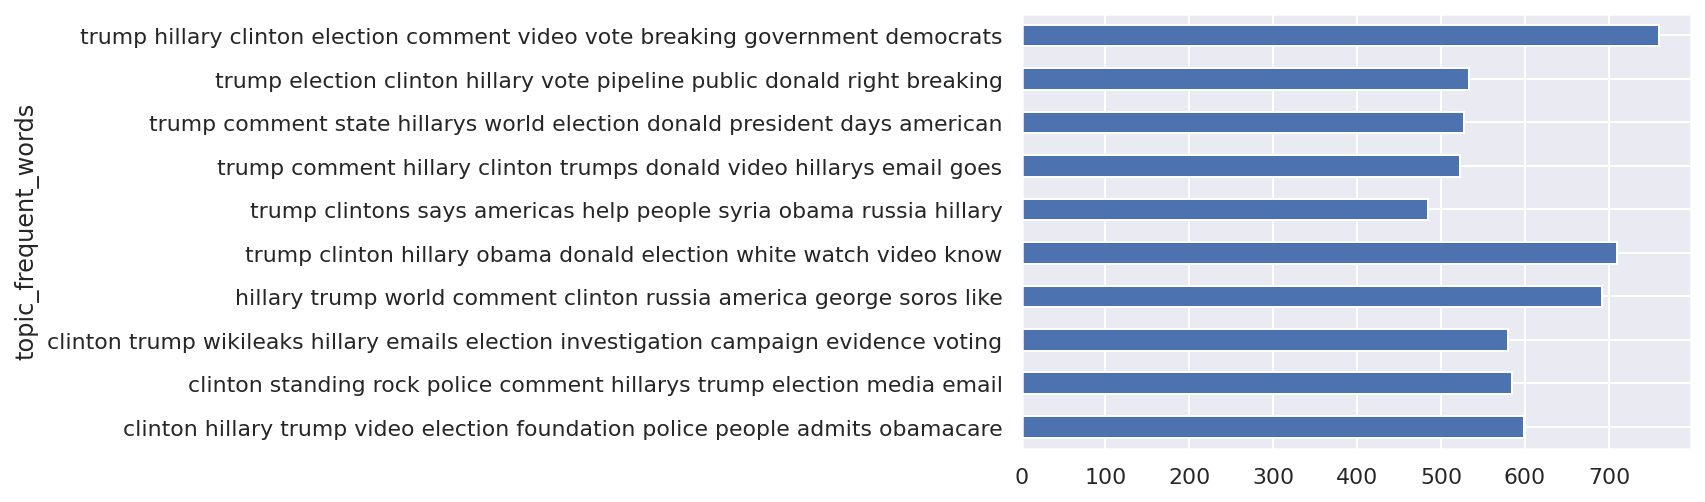

In [203]:
df_clickbait.groupby(['topic_frequent_words']).size().plot(kind='barh')

In [204]:
df_clickbait['topic_number'].value_counts()

1    760
3    710
5    692
0    599
4    585
8    580
7    533
6    527
9    522
2    485
Name: topic_number, dtype: int64

###Taking high frequency words and computing the clickbait feature

In [205]:
tt = df_clickbait.clean_title.str.split(expand=True).stack().value_counts()
type(tt)

pandas.core.series.Series

In [0]:
tt_1 = df_clickbait.clean_title.str.split(expand=True).stack()

In [207]:
print(tt[:10])
count = 0
#total_rows = len(df_clickbait)
total_rows = len(tt_1)
sum = 0
dict_cb = {"True" : [], "False" : [], "Mostly" : [], "Half" : [], "Barely" : [], "Pants" : [] }
for k in tt.keys() :
  sum = sum + int(tt[count])
  pct = sum/total_rows
  #print(k,sum,pct)
  if pct < 0.1 :
    dict_cb["True"].append(k)
  elif pct < 0.15 :
    dict_cb["Mostly"].append(k)
  elif pct < 0.3 :
    dict_cb["Half"].append(k)
  elif pct < 0.6 :
    dict_cb["Pants"].append(k)
  elif pct < 0.8 :
    dict_cb["Barely"].append(k)    
  elif pct < 1.0 :
    dict_cb["False"].append(k)       
  count += 1
print("count : ",  count)
for k,v in dict_cb.items() :
  print(len(v))
  print(k,v)


trump       815
hillary     627
clinton     502
election    295
new         284
fbi         233
comment     230
video       217
donald      165
obama       153
dtype: int64
count :  10298
17
True ['trump', 'hillary', 'clinton', 'election', 'new', 'fbi', 'comment', 'video', 'donald', 'obama', 'war', 'emails', 'email', 'campaign', 'russia', 'people', 'wikileaks']
6977
False ['joy', 'painkillers', 'snow', 'flat', 'nusra', 'humans', 'blockade', 'mining', 'impending', 'cair', 'dressed', 'honey', 'youve', 'teachers', 'atm', 'chinas', 'alcohol', 'cancers', 'thoughts', 'envoy', 'lucifer', 'quickly', 'slab', 'pushes', 'fundraising', 'fck', 'values', 'arrives', 'janet', 'suffers', 'raw', 'shouldnt', 'nutritower', 'imperialism', 'philadelphia', 'iraqs', 'models', 'related', 'emotions', 'investigations', 'gateway', 'baked', 'na', 'raping', 'firm', 'offset', 'pepe', 'authority', 'holocaust', 'meddling', 'weed', 'frontline', 'bribe', 'pic', 'fellow', 'revelation', 'painting', 'grandfather', 'sell', 

In [0]:
def apply_cb_using_words(text) :
  #print(text)
  text = str(text).split(" ")
  #print(text)
  keys = ['True','Mostly','Half','Pants','Barely','False']
  for k in keys :
     if set(text).intersection(set(dict_cb[k])) :
       return k
  return 'False' 

In [209]:
apply_cb_using_words('showing')

'Barely'

In [210]:
df_clickbait['clean_title']

0              muslims busted stole millions govt benefits
1               attorney general loretta lynch plead fifth
2        breaking weiner cooperating fbi hillary email ...
3        pin drop speech father daughter kidnapped kill...
4        fantastic trumps point plan reform healthcare ...
                               ...                        
12907            stocks pumpndump crude crumbles week lows
12909                             rules rulers world works
12910              fact check trump right clinton cause ww
12911    caught tape isis destroys iraqi abrams antitan...
12912    obamacare architect admits law working designe...
Name: clean_title, Length: 5993, dtype: object

In [0]:
# clickbait_features = ['clickbait']
colname = 'clean_title'
def update_data_set_for_clickbait_features1(dataframe):
    dataframe['clickbait'] = dataframe.apply(lambda row: apply_cb_using_words(row[colname]), axis=1)
    return dataframe


In [0]:
df_clickbait = update_data_set_for_clickbait_features1(df_clickbait)

In [213]:
df_clickbait.head(5)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,clickbait
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,9,0.480581,trump comment hillary clinton trumps donald vi...,Half
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,1,0.702909,trump hillary clinton election comment video v...,Pants
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,breaking weiner cooperating fbi hillary email ...,5,0.871408,hillary trump world comment clinton russia ame...,True
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,pin drop speech father daughter kidnapped kill...,9,0.496496,trump comment hillary clinton trumps donald vi...,True
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,fantastic trumps point plan reform healthcare ...,9,0.909991,trump comment hillary clinton trumps donald vi...,Mostly


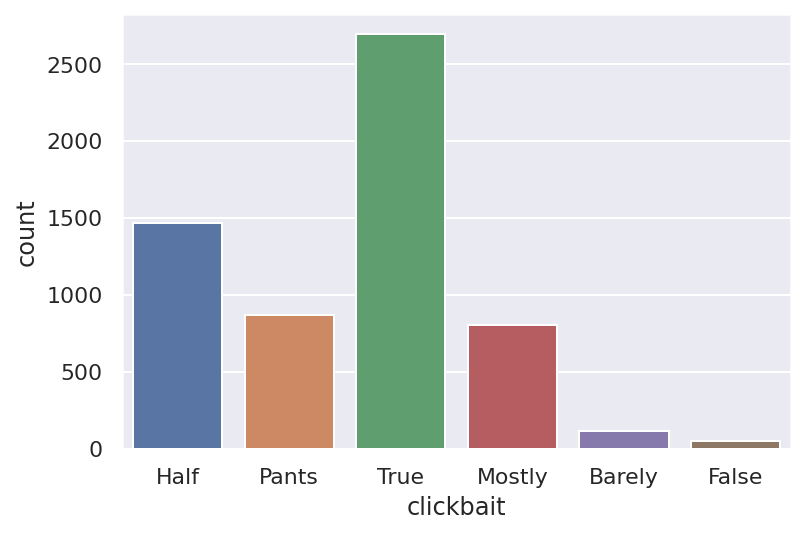

In [214]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="clickbait", data=df_clickbait)

In [0]:
def find_question(text):
    c = text.count('?')
    return c

In [0]:
def find_exclamation(text):
    c = text.count('!')
    return c

In [0]:
def find_modulo(text):
    c = text.count('%')
    return c

In [0]:
def find_hash(text):
    c = text.count('#')
    return c

In [0]:
import string
def find_caps_ratio(text):
    temp_np_title = text.strip(string.punctuation).split()
    np_title = [word.strip(string.punctuation) for word in temp_np_title]
    final_title = [word for word in np_title if word not in set(stopwords.words('english'))]
    final_title = " ".join(final_title)
    num_caps = len([elem for elem in final_title if elem.isupper()])
    num_words = len([elem for elem in final_title if elem == ' ']) + 1
    ratio = num_caps / num_words
    return ratio

In [0]:
colname = 'title'

In [0]:
clickbait_features = ['question','exclamation','modulo','hash','caps_ratio','length_of_text']
def update_data_set_for_clickbait_features(dataframe):
    dataframe[clickbait_features] = dataframe.apply(lambda row: pd.Series([find_question(str(row[colname])), find_exclamation(str(row[colname])), find_modulo(str(row[colname])), find_hash(str(row[colname])), find_caps_ratio(str(row[colname])),str(len(str(row[colname])))]),axis=1)
    return dataframe

In [0]:
df_clickbait = update_data_set_for_clickbait_features(df_clickbait)

In [0]:
for x in ['question','exclamation','modulo','hash']:
   print(df_clickbait[x].unique())
   print(df_clickbait[x].value_counts())

[0 1 2 5 3]
0    5513
1     457
2      21
3       1
5       1
Name: question, dtype: int64
[0 1 2 3 4]
0    5668
1     282
2      31
3       8
4       4
Name: exclamation, dtype: int64
[0 1 2]
0    5936
1      49
2       8
Name: modulo, dtype: int64
[0 1 2 3]
0    5958
1      33
3       1
2       1
Name: hash, dtype: int64


In [0]:
def clickbait_label(x):
  if (x == 'True'):
    return 1.0
  elif (x == 'Mostly'):
    return 0.8
  elif (x == 'Half'):
    return 0.6
  elif (x == 'Pants'):
    return 0.4
  elif (x == 'Barely'):
    return 0.2
  elif (x == 'False'):
    return 0.1

In [0]:
df_clickbait['clickbait_label']=df_clickbait['clickbait'].apply(clickbait_label)

In [0]:
df_clickbait.head()

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,clickbait,question,exclamation,modulo,hash,caps_ratio,length_of_text,clickbait_label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,6,0.573388,trump hillary clinton russia obama election em...,Half,0,0,0,0,1.625000,53,0.6
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,4,0.871425,trump election clinton hillary says donald day...,Pants,1,0,0,0,1.000000,59,0.4
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,breaking weiner cooperating fbi hillary email ...,6,0.481589,trump hillary clinton russia obama election em...,True,0,0,0,0,2.000000,68,1.0
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,pin drop speech father daughter kidnapped kill...,4,0.783839,trump election clinton hillary says donald day...,True,0,1,0,0,2.315789,125,1.0
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,fantastic trumps point plan reform healthcare ...,5,0.733382,hillary clinton trump video trumps exposed pre...,Mostly,0,2,0,0,2.285714,99,0.8


In [0]:
df_clickbait.shape

(5993, 14)

###Applying Neural Networks

In [0]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [0]:
X_fake_CB = df_clickbait.clean_title.values
y = df_clickbait['clickbait_label']
X_tfidf = tfidf.fit_transform (X_fake_CB)

In [0]:
X_tfidf.shape

(5993, 45)

In [0]:
A = X_tfidf.toarray()
X_tfidf = np.pad(A, ((0,0),(0,99)), mode='constant')

In [0]:
X_tfidf.shape

(5993, 144)

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(144, input_dim=144, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [0]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=1000, verbose=1)
kfold = KFold(n_splits=2)
results = cross_val_score(estimator, X_tfidf, y, cv=kfold)
print("Accuracy: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
2996/2996 [==============================] - 0s 88us/step - loss: 0.5943
Epoch 2/100
2996/2996 [==============================] - 0s 7us/step - loss: 0.5539
Epoch 3/100
2996/2996 [==============================] - 0s 7us/step - loss: 0.5133
Epoch 4/100
2996/2996 [==============================] - 0s 6us/step - loss: 0.4722
Epoch 5/100
2996/2996 [==============================] - 0s 6us/step - loss: 0.4303
Epoch 6/100
2996/2996 [==============================] - 0s 7us/step - loss: 0.3876
Epoch 7/100
2996/2996 [==============================] - 0s 8us/step - loss: 0.3440
Epoch 8/100
2996/2996 [==============================] - 0s 7us/step - loss: 0.2997
Epoch 9/100
2996/2996 [==============================] - 0s 7us/step - loss: 0.2554
Epoch 10/100
2996/2996 [==============================] - 0s 7us/step - loss: 0.2123
Epoch 11/100
2996/2996 [==============================] - 0s 6us/step - loss: 0.1708
Epoch 12/100
2996/2996 [==============================] - 0s 6us/step - l

##Predicting for Liar Liar dataset

In [0]:
X_liar_CB = df_liar.clean_statement.values
X_liar_tfidf = tfidf.fit_transform (X_liar_CB)

In [0]:
X_liar_tfidf.shape

(12791, 144)

In [0]:
estimator.fit(X_tfidf, y)

Epoch 1/100
5993/5993 [==============================] - 0s 15us/step - loss: 0.6371
Epoch 2/100
5993/5993 [==============================] - 0s 6us/step - loss: 0.5592
Epoch 3/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.4796
Epoch 4/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.3938
Epoch 5/100
5993/5993 [==============================] - 0s 6us/step - loss: 0.3032
Epoch 6/100
5993/5993 [==============================] - 0s 6us/step - loss: 0.2117
Epoch 7/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.1291
Epoch 8/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.0662
Epoch 9/100
5993/5993 [==============================] - 0s 6us/step - loss: 0.0301
Epoch 10/100
5993/5993 [==============================] - 0s 6us/step - loss: 0.0192
Epoch 11/100
5993/5993 [==============================] - 0s 7us/step - loss: 0.0196
Epoch 12/100
5993/5993 [==============================] - 0s 6us/step - l

In [0]:
y_liar_pred = estimator.predict(X_liar_tfidf)

12791/12791 [==============================] - 0s 3us/step


##Saving Neural Network model

In [0]:
import pickle
#write to file
with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/clickbait_neural_network.pkl', 'wb') as f:
    pickle.dump(estimator, f)

#read from file
# with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/clickbait_neural_network.pkl', 'rb') as f:
#     CB_NN = pickle.load(f)

##Predicting for News category dataset

In [0]:
X_news_text = df_newscat.clean_text.values
X_news_tfidf = tfidf.fit_transform (X_news_text)

In [0]:
X_news_tfidf.shape

(26913, 84)

In [0]:
A = X_news_tfidf.toarray()
X_news_tfidf = np.pad(A, ((0,0),(0,60)), mode='constant')

In [0]:
X_news_tfidf.shape

(26913, 144)

In [0]:
y_news_pred = estimator.predict(X_news_tfidf)

26913/26913 [==============================] - 0s 2us/step


In [0]:
df_newscat['clickbait'] = y_news_pred 
df_liar['clickbait'] = y_liar_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df_newscat.head(2)

,category,headline,authors,link,short_description,date,clean_text,textlabel,clickbait
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true,0.988805
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true,0.502853


In [0]:
df_liar.head(2)

,clean_statement,speaker,subject,class,clickbait
8306,john mccain wants oil companies billion tax br...,barack-obama,taxes,TRUE,0.522604
321,old gen eisenhower saluted military personnel ...,rachel-maddow,"history,military",barely-true,0.655021


In [0]:
df1_fake['textlabel'].value_counts()

FALSE    5993
Name: textlabel, dtype: int64

In [0]:
df_liar = df_liar.rename(columns = {'class':'textlabel'})

In [0]:
df_liar.head(2)

,clean_statement,speaker,subject,textlabel,clickbait
8306,john mccain wants oil companies billion tax br...,barack-obama,taxes,TRUE,0.522604
321,old gen eisenhower saluted military personnel ...,rachel-maddow,"history,military",barely-true,0.655021


In [0]:
df_clickbait = df_clickbait.rename(columns = {'clickbait_label':'class'})

In [0]:
df_clickbait.head(2)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,clickbait,question,exclamation,modulo,hash,caps_ratio,length_of_text,class
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,6,0.573388,trump hillary clinton russia obama election em...,Half,0,0,0,0,1.625,53,0.6
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,4,0.871425,trump election clinton hillary says donald day...,Pants,1,0,0,0,1.000,59,0.4


##Label_encoding News category dataset


In [0]:
from sklearn import preprocessing
label_encoder_newscat = preprocessing.LabelEncoder()
label_encoder_newscat.fit(df_newscat['textlabel'])
label_NC = label_encoder_newscat.transform(df_newscat['textlabel'])
label_encoder_newscat.transform(df_newscat['textlabel'])

np.unique(label_NC, return_index=True)

(array([0, 1, 2]), array([7332,    0,   11]))

In [0]:
y=label_NC
df_newscat['class'] = y
label_encoder_newscat.inverse_transform(y)

array(['half-true', 'half-true', 'half-true', ..., 'half-true',
       'half-true', 'half-true'], dtype=object)

In [0]:
np.unique(y)

array([0, 1, 2])

##Label encoding Liar Liar dataset

In [0]:
label_encoder_liar = preprocessing.LabelEncoder()
label_encoder_liar.fit(df_liar['textlabel'])
label_liar = label_encoder_liar.transform(df_liar['textlabel'])
label_encoder_liar.transform(df_liar['textlabel'])

np.unique(label_liar, return_index=True)

(array([0, 1, 2, 3, 4, 5]), array([ 5,  0,  1,  4,  9, 27]))

In [0]:
y_liar=label_liar
df_liar['class'] = y_liar
label_encoder_liar.inverse_transform(y_liar)

array(['TRUE', 'barely-true', 'TRUE', ..., 'TRUE', 'TRUE', 'barely-true'],
      dtype=object)

In [0]:
np.unique(y)

array([0, 1, 2])

In [0]:
df_liar.head(2)

,clean_statement,speaker,subject,textlabel,clickbait,class
8306,john mccain wants oil companies billion tax br...,barack-obama,taxes,TRUE,0.522604,1
321,old gen eisenhower saluted military personnel ...,rachel-maddow,"history,military",barely-true,0.655021,2


In [0]:
df1_fake.head(2)

,author,title,text,site_url,domain_rank,clean_title,textlabel
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE


In [0]:
df_clickbait['textlabel'] = df1_fake['textlabel']

In [0]:
df_clickbait = df_clickbait.rename(columns = {'clickbait':'clickbait_feature','class':'clickbait'})

##Label encoding clickbait dataset


In [0]:
label_encoder_cb = preprocessing.LabelEncoder()
label_encoder_cb.fit(df_clickbait['textlabel'])
label_cb = label_encoder_cb.transform(df_clickbait['textlabel'])
label_encoder_cb.transform(df_clickbait['textlabel'])

np.unique(label_cb, return_index=True)

(array([0]), array([0]))

In [0]:
y_cb=label_cb
df_clickbait['class'] = y_cb
label_encoder_cb.inverse_transform(y_cb)

array(['FALSE', 'FALSE', 'FALSE', ..., 'FALSE', 'FALSE', 'FALSE'],
      dtype=object)

In [0]:
df_clickbait.head(2)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,clickbait_feature,question,exclamation,modulo,hash,caps_ratio,length_of_text,clickbait,textlabel,class
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,6,0.573388,trump hillary clinton russia obama election em...,Half,0,0,0,0,1.625,53,0.6,FALSE,0
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,4,0.871425,trump election clinton hillary says donald day...,Pants,1,0,0,0,1.000,59,0.4,FALSE,0


In [0]:
df_newscat.head(2)

,category,headline,authors,link,short_description,date,clean_text,textlabel,clickbait,class
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true,0.988805,1
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true,0.502853,1


##Merging all the three dataset by row wise


In [0]:
d1 = df_clickbait[['class','clickbait']].values
d2 = df_newscat[['class', 'clickbait']].values
d3 = df_liar[['class', 'clickbait']].values

In [0]:
dat = np.vstack((d1,d2))

In [0]:
arr = np.vstack((dat, d3))

In [0]:
arr.shape

(45697, 2)

In [0]:
df_CB = pd.DataFrame(arr, columns=['label','clickbait'])

In [0]:
df_CB.head(2)

,label,clickbait
0,0.0,0.6
1,0.0,0.4


In [0]:
df_CB['label'].value_counts()

1.0    28644
0.0     8501
3.0     2627
4.0     2454
2.0     2424
5.0     1047
Name: label, dtype: int64

##RandomForest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, auc

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_CB['clickbait'], df_CB['label'], test_size=0.20, random_state=42)

In [0]:
xtrain = np.asmatrix(X_train)
xtest = np.asmatrix(X_test)
xtrain.shape
xtest.shape

(1, 9140)

In [0]:
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

In [0]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(xtrain, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
ypred = clf.predict(xtest)

In [0]:
rfscore = accuracy_score(y_test, ypred)
rff1 = f1_score(y_test, ypred, average='weighted')
rff1

0.7131454676373942

##XGBoost

In [0]:
from xgboost import XGBClassifier

In [0]:
model = XGBClassifier()
model.fit(xtrain, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
ypred = model.predict(xtest)
xgscore = accuracy_score(y_test, ypred)
xgf1 = f1_score(y_test, ypred, average='weighted')
xgf1

0.6913087982654653

##Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
decTclf = DecisionTreeClassifier(random_state=0)
decTclf.fit(xtrain, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
ypred = decTclf.predict(xtest)
decscore = accuracy_score(y_test, ypred)
decf1 = f1_score(y_test, ypred, average='weighted')
decf1

0.7110790762493231

##Saving Classification model..

In [0]:
import pickle
#write to file
with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/clickbait.pkl', 'wb') as f:
    pickle.dump(clf, f)

#read from file
with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/clickbait.pkl', 'rb') as f:
    rf = pickle.load(f)

In [0]:
print(xtest.shape)
y_pred = rf.predict(xtest)
accuracy_score(y_test, y_pred)

(9140, 1)


0.7256017505470459

In [0]:
df_liar.head()

,clean_statement,speaker,subject,textlabel,clickbait,class
8306,john mccain wants oil companies billion tax br...,barack-obama,taxes,TRUE,0.522604,1
321,old gen eisenhower saluted military personnel ...,rachel-maddow,"history,military",barely-true,0.655021,2
12759,heroin comes united states southern border,donald-trump,drugs,TRUE,0.574641,1
6347,lady clinton travel places small poor dangerou...,hillary-clinton,foreign-policy,barely-true,0.928823,2
11318,major religion opposed samesex marriage,phil-burress,"gays-and-lesbians,religion",half-true,0.502853,3


In [0]:
df_liar_index = df_liar.sort_index(axis = 0)

In [0]:
df_liar_test = df_liar_index.iloc[0:3000, :]

In [0]:
df_liar_test.shape

(3000, 6)

In [0]:
df_liar_test.head()

,clean_statement,speaker,subject,textlabel,clickbait,class
0,says annies list political group supports thir...,dwayne-bohac,abortion,FALSE,0.577435,0
1,decline coal start started natural gas took st...,scott-surovell,"energy,history,job-accomplishments",half-true,0.765220,3
2,hillary clinton agrees john mccain voting geor...,barack-obama,foreign-policy,mostly-true,0.755394,4
3,health care reform legislation likely mandate ...,blog-posting,health-care,FALSE,0.680305,0
4,economic turnaround started end term,charlie-crist,"economy,jobs",half-true,0.502853,3


In [0]:
df_liar_test.tail()

,clean_statement,speaker,subject,textlabel,clickbait,class
2995,percentage texas high school students meeting ...,don-willett,"children,education",TRUE,0.616452,1
2996,obamas liberal fiscal agenda billion new spending,republican-national-committee-republican,federal-budget,half-true,0.549793,3
2997,tommy thompson millions corporations outsource...,majority-pac,"corporations,jobs,message-machine-2012,workers",half-true,0.770090,3
2998,georgia welldeserved reputation setting gold s...,kevin-levitas,food-safety,FALSE,0.803608,0
2999,asked unions pay health care insurance said un...,scott-walker,"health-care,labor,state-budget,state-finances",barely-true,0.649275,2


In [0]:
df_liar_CB = df_liar_test[['clickbait']]

In [0]:
type(df_liar_CB)

pandas.core.frame.DataFrame

In [0]:
df_liar_CB.head()

,clickbait
0,0.577435
1,0.765220
2,0.755394
3,0.680305
4,0.502853


In [0]:
df_liar_CB.shape

(3000, 1)

In [0]:
print(df_liar_CB.shape)
y_pred = rf.predict(df_liar_CB)
# accuracy_score(y_test, y_pred)
y_pred

(3000, 1)


array([0., 3., 4., ..., 3., 1., 2.])

In [0]:
y_pred = y_pred.astype(int)

In [0]:
y_pred_list = y_pred.tolist()
labels = list(label_encoder_liar.inverse_transform(y_pred_list))
# arr = np.asarray(y_pred_list)
labels

['FALSE',
 'half-true',
 'mostly-true',
 'FALSE',
 'TRUE',
 'TRUE',
 'half-true',
 'mostly-true',
 'half-true',
 'mostly-true',
 'mostly-true',
 'half-true',
 'FALSE',
 'mostly-true',
 'FALSE',
 'half-true',
 'FALSE',
 'TRUE',
 'half-true',
 'mostly-true',
 'FALSE',
 'mostly-true',
 'mostly-true',
 'half-true',
 'barely-true',
 'TRUE',
 'TRUE',
 'half-true',
 'TRUE',
 'FALSE',
 'barely-true',
 'TRUE',
 'FALSE',
 'mostly-true',
 'TRUE',
 'FALSE',
 'TRUE',
 'TRUE',
 'TRUE',
 'TRUE',
 'FALSE',
 'FALSE',
 'pants-fire',
 'TRUE',
 'TRUE',
 'FALSE',
 'pants-fire',
 'TRUE',
 'pants-fire',
 'FALSE',
 'barely-true',
 'FALSE',
 'FALSE',
 'TRUE',
 'barely-true',
 'half-true',
 'half-true',
 'barely-true',
 'FALSE',
 'mostly-true',
 'FALSE',
 'mostly-true',
 'FALSE',
 'mostly-true',
 'TRUE',
 'TRUE',
 'TRUE',
 'half-true',
 'barely-true',
 'TRUE',
 'TRUE',
 'barely-true',
 'mostly-true',
 'mostly-true',
 'TRUE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'half-true',
 'barely-true',
 'half-true',
 'FA

###Reading csv file of feature vector

In [0]:
noderankdf = pd.read_csv(base_dir+'/Alternus_vera/Classification_2.csv') 
noderankdf['clickbaitclass'] = labels
 noderankdf.head(3)

,Unnamed: 0,Unnamed: 0.1,NodeRankClass,politicalbiasClass,clickbaitclass
0,0,0,FALSE,FALSE,FALSE
1,1,1,half-true,mostly-true,half-true
2,2,2,mostly-true,mostly-true,mostly-true


In [0]:
noderankdf.tail()

,Unnamed: 0,Unnamed: 0.1,NodeRankClass,politicalbiasClass,clickbaitclass
2995,2995,2995,FALSE,FALSE,TRUE
2996,2996,2996,mostly-true,FALSE,half-true
2997,2997,2997,FALSE,mostly-true,half-true
2998,2998,2998,mostly-true,mostly-true,TRUE
2999,2999,2999,FALSE,FALSE,barely-true


###After adding clickbait feature column to the csv file, writing it into another file csv..


In [0]:
# with open(base_dir + '/Alternus_vera/Classification_3.csv', 'a') as f:
#    noderankdf.to_csv(f)